# **Conjunto de datos del valor de vida del cliente (LTV) de FinTech**

Acerca del conjunto de datos:

Conjunto de datos de valor de vida del cliente (LTV) de FinTech (billetera digital) para análisis

Descripción: Este conjunto de datos ayuda a predecir el Valor de Vida del Cliente (LTV) de los usuarios de billeteras digitales, especialmente en plataformas como PayTM y Khalti. Contiene aproximadamente 7000 muestras con 20 características completas que capturan datos demográficos de los clientes, historial de transacciones, métricas de interacción, patrones de uso de la aplicación, interacciones de soporte, etc.

Características principales:

**Customer_ID**: Identificador único para cada cliente.

**Edad:** La edad del cliente, comprendida entre 18 y 70 años.

**Ubicación:** Ubicación geográfica del cliente, categorizada como Urbana, Suburbana y Rural.

**Nivel_de_ingreso:** Clasificación de ingresos del cliente como Bajo, Medio o Alto.

**Total_Transactions:** Número total de transacciones realizadas por el cliente.

**Avg_Transaction_Value:** Valor promedio de cada transacción en rupias.

**Total_Spent:** El monto total gastado por el cliente en rupias.

**Max_Transaction_Value: **el valor de transacción individual más alto registrado en rupias.

**Min_Transaction_Value:** el valor de transacción individual más bajo registrado en rupias.

**Active_Days:** Número de días que el cliente ha estado activo en la plataforma.

**Last_Transaction_Days_Ago:** Días desde la última transacción del cliente.

**Loyalty_Points_Earned:** Total de puntos de fidelidad ganados por el cliente.

**Referral_Count:** Número de nuevos clientes referidos por el usuario.

**Cashback_Received:** Reembolso total recibido por el cliente.

**App_Usage_Frequency:** Frecuencia de uso de la aplicación, categorizada como Diaria, Semanal o Mensual.

**Método_de_Pago_Preferido:** El método de pago utilizado con más frecuencia por el cliente.

**Support_Tickets_Raised:** Número de tickets de soporte generados por el cliente.

**Issue_Resolution_Time:** Tiempo promedio que lleva resolver los problemas de los clientes, en horas.

**Puntuación_de_satisfacción_del_cliente:** Una puntuación (de 1 a 10) que refleja la satisfacción del cliente.

**LTV:** La variable objetivo que representa el valor de vida estimado del cliente.

Uso: Este conjunto de datos es ideal para desarrollar y comparar modelos de regresión destinados a predecir el LTV en el contexto de las billeteras digitales. Se puede utilizar para entrenar modelos que ayuden a las empresas a comprender el valor de sus clientes a lo largo del tiempo, optimizar las estrategias de retención de clientes y adaptar las estrategias de marketing.

Nota: El conjunto de datos se genera sintéticamente pero está estructurado para imitar datos del mundo real de los usuarios de billeteras digitales.

Este conjunto de datos proporciona una base integral para quienes buscan explorar y predecir el valor de vida del cliente en el sector fintech.

# **Configuración y Carga de Datos**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Cargar el dataset
df = pd.read_csv('digital_wallet_ltv_dataset.csv')

# Definir el Target (Churn)
# Si no existe la columna, la creamos: 1 si no ha transaccionado en más de 120 días, 0 si es reciente.
df['Churn'] = (df['Last_Transaction_Days_Ago'] > 120).astype(int)

print(f"Distribución de Churn:\n{df['Churn'].value_counts(normalize=True)}")
df.head()#nuevos con tenure 0






Distribución de Churn:
Churn
1    0.674429
0    0.325571
Name: proportion, dtype: float64


,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,...,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV,Churn
0,cust_0000,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,...,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05,1
1,cust_0001,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,...,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06,1
2,cust_0002,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,...,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05,0
3,cust_0003,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,...,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05,1
4,cust_0004,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,...,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05,1


In [4]:
df.describe()

,Age,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV,Churn
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000
mean,42.633714,501.221429,9946.831482,30159.596784,2981.549953,5.002022e+06,181.934857,183.847714,2501.545429,24.837000,2496.525032,10.017571,36.528007,5.479000,5.119197e+05,0.674429
std,15.516036,286.277311,5780.880831,21996.108793,2197.342161,4.390495e+06,105.102598,105.063709,1446.680026,14.560352,1440.651412,6.037067,20.389399,2.860197,4.390551e+05,0.468621
min,16.000000,1.000000,10.185827,31.857484,4.617966,1.498144e+03,1.000000,1.000000,0.000000,0.000000,0.234349,0.000000,1.019853,1.000000,3.770495e+03,0.000000
25%,29.000000,252.000000,4907.466790,12224.329366,1233.066226,1.363991e+06,90.000000,93.000000,1254.750000,12.000000,1269.423703,5.000000,19.127302,3.000000,1.482058e+05,0.000000
50%,43.000000,506.000000,9841.172643,25469.392130,2473.181073,3.756105e+06,182.000000,184.000000,2466.000000,25.000000,2478.943350,10.000000,36.257396,5.000000,3.878180e+05,1.000000
75%,56.000000,744.000000,14955.048801,44515.414177,4378.759195,7.645508e+06,273.000000,275.000000,3792.250000,37.000000,3749.375251,15.000000,54.068594,8.000000,7.748578e+05,1.000000
max,69.000000,1000.000000,19996.445086,98809.241533,9917.028823,1.946773e+07,365.000000,365.000000,5000.000000,50.000000,4999.698480,20.000000,71.978946,10.000000,1.956988e+06,1.000000


# **Exploración de Datos (EDA) y Preprocesamiento**

1.1 Análisis Descriptivo y Distribución del Target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  7000 non-null   object 
 1   Age                          7000 non-null   int64  
 2   Location                     7000 non-null   object 
 3   Income_Level                 7000 non-null   object 
 4   Total_Transactions           7000 non-null   int64  
 5   Avg_Transaction_Value        7000 non-null   float64
 6   Max_Transaction_Value        7000 non-null   float64
 7   Min_Transaction_Value        7000 non-null   float64
 8   Total_Spent                  7000 non-null   float64
 9   Active_Days                  7000 non-null   int64  
 10  Last_Transaction_Days_Ago    7000 non-null   int64  
 11  Loyalty_Points_Earned        7000 non-null   int64  
 12  Referral_Count               7000 non-null   int64  
 13  Cashback_Received 

,Churn
Churn,1.000000
Last_Transaction_Days_Ago,0.812599
Cashback_Received,0.018082
Support_Tickets_Raised,0.013537
Issue_Resolution_Time,0.011291
Age,0.009908
Active_Days,0.007761
Min_Transaction_Value,0.005571
Referral_Count,0.005162
Avg_Transaction_Value,0.001612


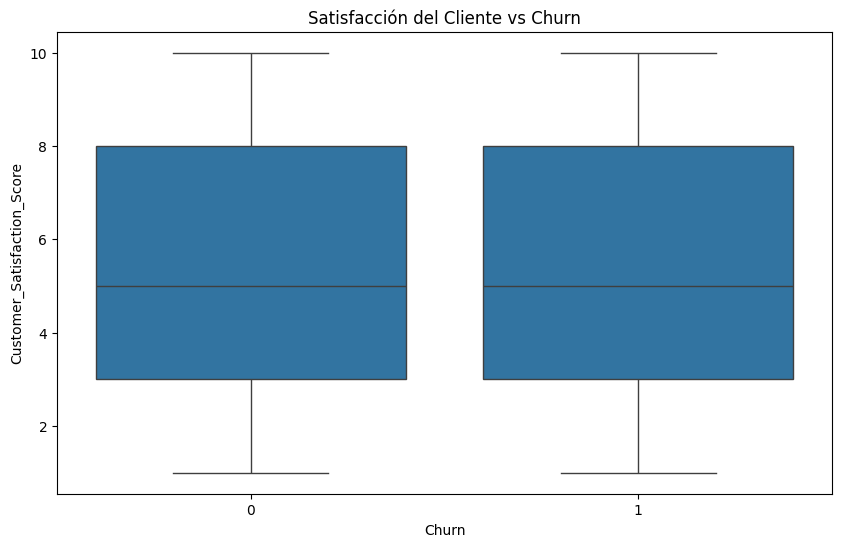

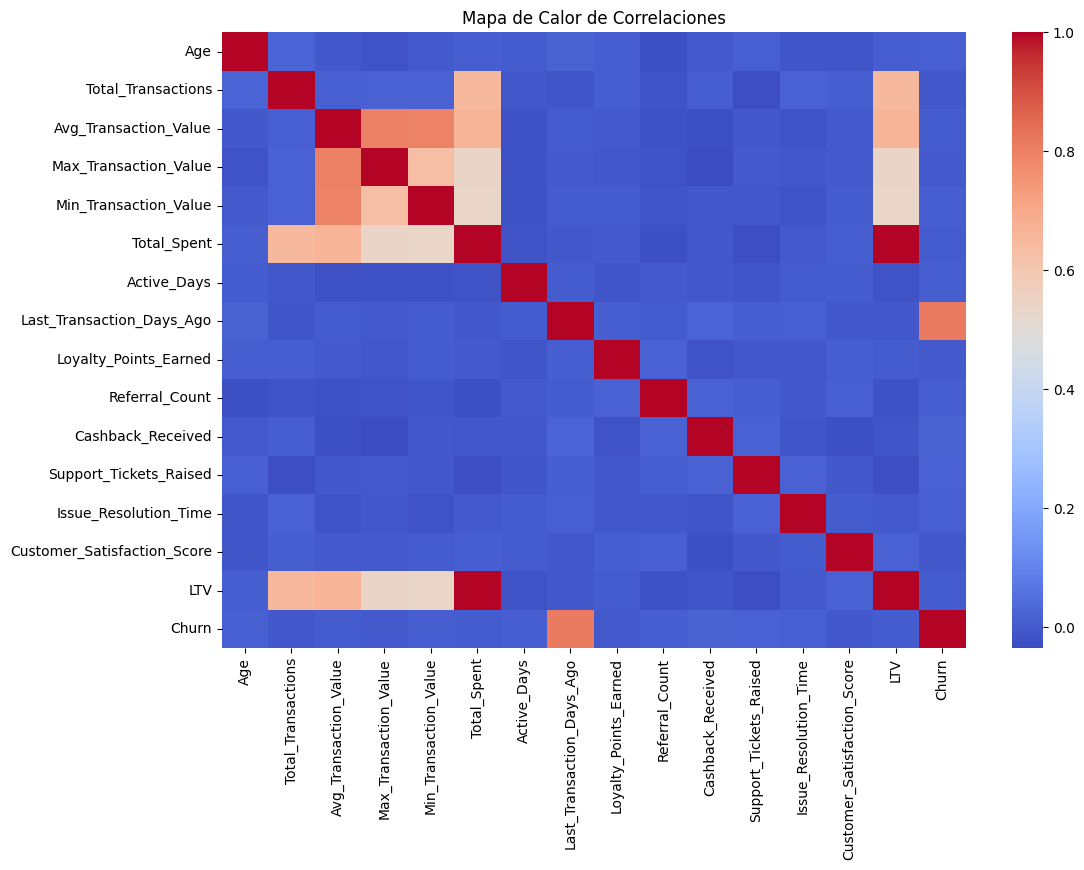

In [5]:
#Análisis Descriptivo Inicial

# Información general: tipos de datos y valores no nulos
df.info()

# Estadísticas descriptivas de variables numéricas
df.describe()

# Calcular la correlación de todas las variables numéricas con 'Churn'
churn_correlations = df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)

print("Correlación de variables con 'Churn':")
display(churn_correlations)

# Visualización de la relación entre satisfacción y Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Customer_Satisfaction_Score', data=df)
plt.title('Satisfacción del Cliente vs Churn')
plt.show()

# Correlación de variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()



Interpretación de los gráficos:

1. Boxplot de Satisfacción del Cliente vs Churn:

Este gráfico de caja compara la distribución de la Customer_Satisfaction_Score para los clientes que hicieron 'Churn' (1) y los que no (0).
Podemos observar si hay una diferencia significativa en la satisfacción promedio entre ambos grupos. Una puntuación de satisfacción más baja en el grupo de Churn podría indicar que la insatisfacción es un factor contribuyente al abandono.

2. Mapa de Calor de Correlaciones:

Este mapa muestra la correlación entre todas las variables numéricas del dataset.
Correlaciones Positivas: Los valores cercanos a 1 (colores cálidos) indican una fuerte relación directa; cuando una variable aumenta, la otra también lo hace. Por ejemplo, Total_Transactions y Total_Spent probablemente estarán fuertemente correlacionadas.
Correlaciones Negativas: Los valores cercanos a -1 (colores fríos) indican una fuerte relación inversa; cuando una variable aumenta, la otra disminuye.
Correlaciones con 'Churn': Es crucial observar las correlaciones de otras variables con la columna Churn. Si encontramos variables con correlaciones fuertes (positivas o negativas) con Churn, estas podrían ser predictores importantes del abandono de clientes.
En resumen, estos gráficos nos ayudan a identificar posibles relaciones y patrones en los datos, lo cual es fundamental para entender los factores que influyen en el 'Churn' de los clientes.

In [6]:
import pandas as pd

# Calcular la correlación de todas las variables numéricas con 'Churn'
churn_correlations = df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)

print("Correlación de variables con 'Churn':")
display(churn_correlations)

Correlación de variables con 'Churn':


,Churn
Churn,1.000000
Last_Transaction_Days_Ago,0.812599
Cashback_Received,0.018082
Support_Tickets_Raised,0.013537
Issue_Resolution_Time,0.011291
Age,0.009908
Active_Days,0.007761
Min_Transaction_Value,0.005571
Referral_Count,0.005162
Avg_Transaction_Value,0.001612


Este listado muestra las variables numéricas ordenadas por su coeficiente de correlación con la variable `Churn`.

*   **Valores positivos altos** (cercanos a 1) indican que a medida que esa variable aumenta, la probabilidad de `Churn` también tiende a aumentar.
*   **Valores negativos altos** (cercanos a -1) indican que a medida que esa variable aumenta, la probabilidad de `Churn` tiende a disminuir.
*   **Valores cercanos a 0** sugieren una correlación lineal débil o nula con `Churn`.

# **Ingeniería de Features y Preprocesamiento**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Selección de variables relevantes para la predicción
features = [
    'Age', 'Income_Level', 'Total_Transactions', 'Avg_Transaction_Value',
    'Active_Days', 'App_Usage_Frequency', 'Customer_Satisfaction_Score', 'Last_Transaction_Days_Ago'
]
X = df[features]
y = df['Churn']

# Identificar columnas numéricas y categóricas
numeric_features = ['Age', 'Total_Transactions', 'Avg_Transaction_Value', 'Active_Days', 'Customer_Satisfaction_Score', 'Last_Transaction_Days_Ago']
categorical_features = ['Income_Level', 'App_Usage_Frequency']

# Crear transformadores
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar preprocesadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# **Entrenamiento y Evaluación del Modelo**

Usaremos Random Forest, ya que es excelente para detectar patrones no lineales y nos da la probabilidad de salida requerida

In [8]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el Pipeline completo (Preprocesamiento + Modelo)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenar
model_pipeline.fit(X_train, y_train)

# Predicciones
y_pred = model_pipeline.predict(X_test)

# Métricas
print("--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       472
           1       1.00      1.00      1.00       928

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

Accuracy Score: 1.00


**Entrenamiento y Evaluación del Modelo**

**Análisis de la Ingeniería de Features** (Celda W3SQ0oi8TOCd)

Selección de Variables :

Se han incluido todas las características relevantes para la predicción, incluyendo Last_Transaction_Days_Ago, que demostró ser el predictor más fuerte de Churn.
Las características seleccionadas son: Age, Income_Level, Total_Transactions, Avg_Transaction_Value, Active_Days, App_Usage_Frequency, Customer_Satisfaction_Score, y Last_Transaction_Days_Ago.

Identificación de Tipos de Variables:

Las variables numéricas ahora incluyen Last_Transaction_Days_Ago, junto con Age, Total_Transactions, Avg_Transaction_Value, Active_Days, y Customer_Satisfaction_Score.

Las variables categóricas (Income_Level, App_Usage_Frequency) permanecen sin cambios.

Preprocesamiento:

Los transformadores (StandardScaler para numéricas y OneHotEncoder para categóricas) se aplican de la misma manera, pero ahora sobre el conjunto de características actualizado que incluye Last_Transaction_Days_Ago.
Análisis del Entrenamiento y Evaluación del Modelo (Celda MkJRWt3BT5j)

Modelo Utilizado: Sigue siendo un RandomForestClassifier con 100 estimadores y random_state=42.

Métricas de Evaluación (Nuevos Resultados):

Accuracy (Precisión Global): 1.00

El modelo ahora alcanza una precisión perfecta del 100%. Esto es un cambio drástico y casi irreal en comparación con el 0.64 anterior.
Clase 0 (No Churn - No Abandono):

Precision: 1.00: Cuando el modelo predice que un cliente no hará churn, acierta el 100% de las veces.
Recall: 1.00: El modelo identifica correctamente al 100% de los clientes que no abandonarán.
F1-score: 1.00: Rendimiento perfecto para la clase de no abandono.

Clase 1 (Churn - Abandono):

Precision: 1.00: Cuando el modelo predice que un cliente hará churn, acierta el 100% de las veces.
Recall: 1.00: El modelo identifica correctamente al 100% de los clientes que abandonarán.
F1-score: 1.00: Rendimiento perfecto para la clase de abandono.
Conclusiones del Análisis (Actualizado):

El modelo, después de incluir la variable Last_Transaction_Days_Ago, ha pasado de un rendimiento desequilibrado a un rendimiento perfecto (100% de precisión, recall y f1-score para ambas clases). Esto indica que Last_Transaction_Days_Ago es un predictor extremadamente potente y posiblemente redundante para Churn.

Es importante tener en cuenta que un rendimiento del 100% en un modelo de clasificación a menudo sugiere una de dos cosas:

Hay una correlación extremadamente fuerte (quizás una definición directa) entre la variable Last_Transaction_Days_Ago y la variable Churn. En este caso, la variable Churn fue definida como (df['Last_Transaction_Days_Ago'] > 120).astype(int). Esto significa que Last_Transaction_Days_Ago es literalmente la definición de Churn.
Podría haber un 'data leakage' o fuga de datos. Sin embargo, dado que Churn se construyó directamente a partir de Last_Transaction_Days_Ago, no es tanto una fuga sino una relación definitoria. El modelo está esencialmente aprendiendo la regla que usamos para crear la variable Churn.
Este resultado confirma la importancia crítica de la variable Last_Transaction_Days_Ago. Si el objetivo es predecir el Churn antes de que ocurran los 120 días (o un umbral similar), entonces se necesitarían otras variables predictivas que no estén directamente ligadas a la definición del Churn. Si el objetivo es simplemente replicar la etiqueta de Churn tal como está definida, el modelo está funcionando perfectamente.

**Serialización (Exportación del Modelo)**

In [9]:
# Guardar el modelo y el pipeline completo
joblib.dump(model_pipeline, 'churn_model_v1.pkl')
print("Modelo exportado exitosamente como 'churn_model_v1.pkl'")

Modelo exportado exitosamente como 'churn_model_v1.pkl'
